# Porosityケース

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

%matplotlib inline

# Grid
* NX=160, NY=269 (=43,040)
* 1grid =50m
* 8000m, 13450m
* 26246ft, 44127 ft

In [2]:
NX=160
NY=269
Xmeter=NX*50
Ymeter=NY*50
Xfeet=NX*50*3.28084
Yfeet=NY*50*3.28084
print (Xmeter, Ymeter, Xfeet, Yfeet)

8000 13450 26246.72 44127.298


# Hard Data の読み込み

In [3]:
hard=pd.read_csv(r'hard\hard_all.txt')
hard.poro = hard.poro.round(2)
print('HardData Number= %d'%len(hard))
hard.head(1)

HardData Number= 49


,x0f,y0f,z,depth,poro,ngr,x,y,D4E,GEOEASz
0,13746.34,18451.65,1,8182.5,16.05,0.8,56437.3,126708.7,D,1


# Soft dataの読み込み
* 42,900 *7 layer point

In [4]:
#softori=pd.read_csv(r'soft\rotsoft_all.txt')
softori=pd.read_csv(r'soft\rotsoft_all_eye2.txt')
softori.poro=softori.poro.round(2)

softori['I']=(softori.index - (softori.z-1)*NX*NY) % NX
softori['J']=(softori.index - (softori.z-1)*NX*NY) // NX

print('SoftData Number= %d, 1-Layer=%d' % (len(softori), len(softori)/7))
softori.head(1)

SoftData Number= 301280, 1-Layer=43040


,x0f,y0f,z,depth,poro,ngr,thickness,D4E,GEOEASz,I,J
0,82.02,82.02,1,9546.34,14.01,0.42358,7.93848,D,1,0,0


# Soft data コントロールポイント数

In [5]:
num=9
displacement=4

cx = list('')
for i in range(NX):
    if (i%num==displacement): 
        cx.append(i)
print (len(cx))
print (cx)

cy = list('')
for i in range(NY):
    if (i%num==displacement): 
        cy.append(i)
print (len(cy))
print (cy)
print (len(cx)*len(cy))

18
[4, 13, 22, 31, 40, 49, 58, 67, 76, 85, 94, 103, 112, 121, 130, 139, 148, 157]
30
[4, 13, 22, 31, 40, 49, 58, 67, 76, 85, 94, 103, 112, 121, 130, 139, 148, 157, 166, 175, 184, 193, 202, 211, 220, 229, 238, 247, 256, 265]
540


In [6]:
def SOFT(i, j):
    return softori[(softori.I==cx[i]) & (softori.J==cy[j])].reset_index(drop=True)


a = pd.DataFrame()
for j in range(len(cy)):
    for i in range(len(cx)):
        c=SOFT(i,j)
        a= pd.concat([a,c])

soft=a.reset_index(drop=True)
print('SoftData Number= %d, 1-Layer=%d' % (len(soft), len(soft)/7))
soft.head(1)

SoftData Number= 3780, 1-Layer=540


,x0f,y0f,z,depth,poro,ngr,thickness,D4E,GEOEASz,I,J
0,738.19,738.19,1,9529.06,13.99,0.42113,7.8667,D,1,4,4


# Hard & Soft data の図

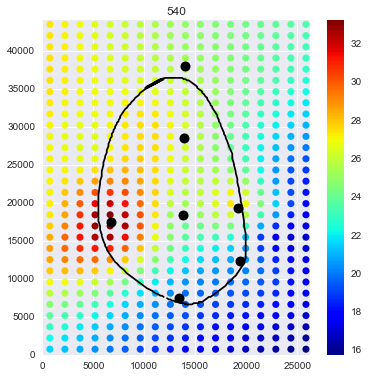

In [7]:
checkz=6
plt.figure(figsize=(6,6))
owc=pd.read_csv(r'owc\GRIDTOP-Z6-ORI.txt', delim_whitespace=True)
plt.scatter(soft[soft.z==checkz].x0f, soft[soft.z==checkz].y0f, c=soft[soft.z==checkz].poro, cmap='jet', s=50, edgecolors='')#, vmin = 0.0, vmax = 50)
plt.plot(hard.x0f[hard.z==checkz], hard.y0f[hard.z==checkz], 'ok', ms=10)
plt.plot(owc.x0f, owc.y0f, '-k', ms=10)
plt.xlim(0,26250)
plt.ylim(0,44130)
plt.colorbar()
num1=len(soft[(soft.z==checkz) & (soft.poro>=0)])
plt.title(num1)
plt.savefig("540.PNG")

In [ ]:
checkz=6
plt.figure(figsize=(6,6))
owc=pd.read_csv(r'owc\GRIDTOP-Z6-ORI.txt', delim_whitespace=True)

for i in range()
plt.scatter(soft[soft.z==checkz].x0f, soft[soft.z==checkz].y0f, c=soft[soft.z==checkz].poro, cmap='jet', s=50, edgecolors='')#, vmin = 0.0, vmax = 50)
plt.plot(hard.x0f[hard.z==checkz], hard.y0f[hard.z==checkz], 'ok', ms=10)
plt.plot(owc.x0f, owc.y0f, '-k', ms=10)
plt.xlim(0,26250)
plt.ylim(0,44130)
plt.colorbar()
num1=len(soft[(soft.z==checkz) & (soft.poro>=0)])
plt.title(num1)
plt.savefig("540.PNG")

# Geo-EASデータ作成

In [8]:
def make_poro_dat(folder, file, z1, z2, z3, wh, ws):
    filein  = folder + r'\\' + r'base\PORO_XYZ.dat'
    fileout = folder + r'\\' + file + '.dat'

    fi = open(filein,'r')
    fo = open(fileout,'w')
    
    for row in fi:
        fo.writelines(row)

    fi.close()
    fo.close()
        
    
    H=hard[(hard.z==z1) | (hard.z==z2) | (hard.z==z3)].reset_index(drop=True)
    H=H.assign(s1=[-1.0]*len(H))
    H=H.assign(w1=[wh]*len(H))
    H=H.rename(columns={'poro':'p1'})
    if (z1==z2 and z2==z3 ): H.GEOEASz = 1 
    H=H[['x0f', 'y0f', 'GEOEASz', 'p1', 's1', 'w1']]
    
    S=soft[((soft.z==z1) | (soft.z==z2) | (soft.z==z3)) & (soft['x0f'] >0)].reset_index(drop=True)
    S=S.assign(s1=[-1.0]*len(S))
    S=S.rename(columns={'poro':'p1'})
    #S=S.assign(p1=[-1.0]*len(S))
    #S=S.rename(columns={'poro':'s1'})
    S=S.assign(w1=[ws]*len(S))
    if (z1==z2 and z2==z3 ): S.GEOEASz = 1 
    S=S[['x0f', 'y0f', 'GEOEASz', 'p1', 's1', 'w1']]

    xyz=pd.concat([H, S]).reset_index(drop=True)
    
    xyz.to_csv(fileout, index=False, header=False, sep=' ', mode='a')


make_poro_dat('RUN_PORO', 'DporoXYZ', 1, 2, 3, 1.0, 0.5)
make_poro_dat('RUN_PORO', 'EporoXYZ', 5, 6, 7, 1.0, 0.5)

# .Parデータ作成 
# Seed 指定

In [9]:
def sgsim(F, file, xyzv, nz, ktype, sec, nug, sill, range_radii, seed):
    
    filedat=F + r'/' + file + r'.dat'
    outtrn=F + r'/' + file + r'.trn'
    outdbg=F + r'/' + file + r'.dbg'
    outout=F + r'/' + file + r'.out'
    
    fo = open(F + r'\\' + file + r'.par', 'w')
    
    
    L0 ='                  Parameters for SGSIM'
    L1 ='                  ********************'
    L2 =''
    L3 ='START OF PARAMETERS:'
    L4 = filedat                               #-  file with data
    L5 = xyzv                                  #-  columns for X,Y,Z,vr,wt,sec.var.'
    L6 ='-1.0       1.0e21'                    #-  trimming limits
    L7 ='1'                                    #-  transform the data (0=no, 1=yes)
    L8 = outtrn                                #-  file for output trans table
    L9 ='0'                                    #-  consider ref. dist (0=no, 1=yes)
    L10='histsmth.out'                         #-  file with ref. dist distribution
    L11='1  2'                                 #-  columns for vr and wt
    L12='0.0    40.0'                          #-  zmin,zmax(tail extrapolation)
    L13='1      0.0'                           #-  lower tail option, parameter
    L14='1      0.0'                           #-  upper tail option, parameter
    L15='0'                                    #-  debugging level: 0,1,2,3
    L16= outdbg                                #-  file for debugging output
    L17= outout                                #-  file for simulation output
    L18='1'                                    #-  number of realizations to generate
    L19='160    82.021  164.042'               #-  nx,xmn,xsiz
    L20='269    82.021  164.042'               #-  ny,ymn,ysiz
    L21= str(nz) + '      1.0   1.0'           #-  nz,zmn,zsiz
    L22= seed                                  #-  random number seed   690169
    L23='0     40'                             #-  min and max original data for sim
    L24='16'                                   #-  number of simulated nodes to use
    L25='1'                                    #-  assign data to nodes (0=no, 1=yes)
    L26='1     3'                              #-  multiple grid search (0=no, 1=yes),num
    L27='0'                                    #-  maximum data per octant (0=not used)
    L28= range_radii                           #-  maximum search radii (hmax,hmin,vert)
    L29='0.0   0.0   0.0'                      #-  angles for search ellipsoid
    L30='51    51    11'                       #-  size of covariance lookup table
    L31=str(ktype) + '     0.60   1.0'         #-  ktype: 0=SK,1=OK,2=LVM,3=EXDR,4=COLC
    L32='Dataset/test.dat'                     #-  file with LVM, EXDR, or COLC variable
    L33= str(sec)                              #-  column for secondary variable
    L34='1  '+ str(nug)                        #-  nst, nugget effect
    L35='1  '+ str(sill) + ' 0.0  0.0  0.0'    #-  it,cc,ang1,ang2,ang3
    L36= range_radii                           #-  a_hmax, a_hmin, a_vert
    
    list1=[L0, L1, L2, L3, L4, L5, L6, L7, L8, L9]
    list2=[L10, L11, L12, L13, L14, L15, L16, L17, L18, L19]
    list3=[L20, L21, L22, L23, L24, L25, L26, L27, L28, L29]
    list4=[L30, L31, L32, L33, L34, L35, L36]
    lista=list1 + list2 + list3 + list4
    
    for i in range(len(lista)):
        fo.writelines(lista[i])
        fo.writelines('\n')

    
# sgsim(F, file, xyzv, nz, ktype, sec, nug, sill, range_radii, seed):
seed='690169'
#seed='190169'
#seed='290169'
#seed='390169'
#seed='490169'
#seed='590169'
#seed='790169'
#seed='890169'
#seed='990169'
sgsim('RUN_PORO', 'DporoXYZ', '1  2  3  4  6  5', 3, 1, 5, 0.0, 1.0, '50000 50000 10.0', seed)
sgsim('RUN_PORO', 'EporoXYZ', '1  2  3  4  6  5', 3, 1, 5, 0.0, 1.0, '50000 50000 10.0', seed)
OUTPORO = 'poro_all_seed' + seed + '.txt'

# 実行run

In [10]:
os.system('sgsim.exe ' +r'RUN_PORO\\'+  'DporoXYZ.par')
os.system('sgsim.exe ' +r'RUN_PORO\\'+  'EporoXYZ.par')

0

# D層(1,2,3) とE層(5,6,7)のsGs
* z(ft)ではなく、z(grid)で実施しているが、これでよいのか？
* Range, serach radii=50000ft, 10ft
* Nugget=0.0
* Sill=1.0
* kriging type (1=OK)

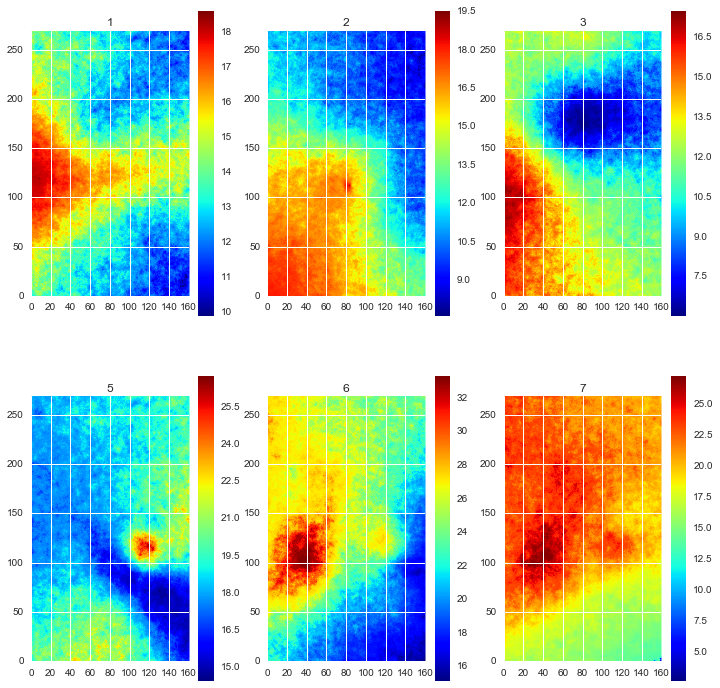

In [17]:
plt.figure(figsize=(12,12))
for n, g in zip([231, 232, 233, 234, 235, 236], [1, 2, 3, 5, 6, 7]): 

    plt.subplot(n)
    fo = 'DporoXYZ' if g<=3 else 'EporoXYZ'
    sgsim3=pd.read_csv(r'RUN_PORO\\' + fo + '.out').ix[2:]
    sgsim3=pd.Series(sgsim3.values.flatten())
    sgsim3=pd.to_numeric(sgsim3, errors='coerce')

    gg = g if g<=3 else g-4
    c=sgsim3.ix[(gg-1)*NX*NY:gg*NX*NY-1]

    graph=c.reshape(NY,NX)
    plt.imshow(graph, interpolation='nearest', cmap='jet')#, vmin = 0.0, vmax = 40)
        
    plt.xlim(0,NX)
    plt.ylim(0,NY)    
    plt.colorbar()
    plt.title(g)

# Porosity 出力

In [12]:
test=pd.read_csv(r'RUN_PORO\DporoXYZ.out').ix[2:]
test=pd.Series(test.values.flatten())
test=pd.to_numeric(test, errors='coerce')
PORD=pd.DataFrame({
        'poro': test,
        'z': test.index//(160*269)+1
    })

test=pd.read_csv(r'RUN_PORO\EporoXYZ.out').ix[2:]
test=pd.Series(test.values.flatten())
test=pd.to_numeric(test, errors='coerce')
PORE=pd.DataFrame({
        'poro': test,
        'z': test.index//(160*269)+1+4
    })


POR4=pd.DataFrame({
        'poro': pd.Series([0]*160*269),
        'z': pd.Series([4]*160*269)
    })
POR=pd.concat([PORD, POR4, PORE], ignore_index=True)
POR.poro=POR.poro/100

with open(OUTPORO, 'w') as f:
    f.write('POR ALL\n')

POR.poro.to_csv(OUTPORO, index=False, mode='a')

# D層(1,2,3) とE層(5,6,7)のヒストグラム

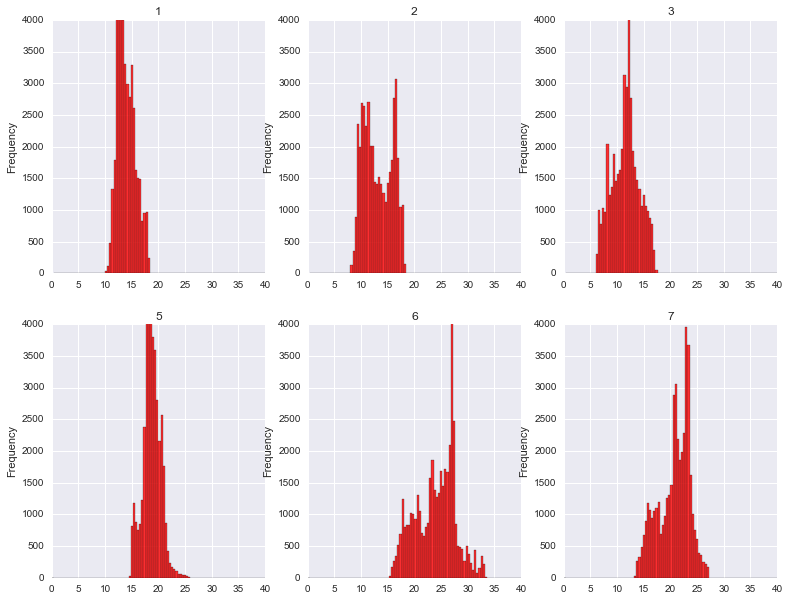

In [13]:
plt.figure(figsize=(13,10))
for n, g in zip([231, 232, 233, 234, 235, 236], [1, 2, 3, 5, 6, 7]): 

    plt.subplot(n)
    fo = 'DporoXYZ' if g<=3 else 'EporoXYZ'
    sgsim3=pd.read_csv(r'RUN_PORO\\' + fo + '.out').ix[2:]
    sgsim3=pd.Series(sgsim3.values.flatten())
    sgsim3=pd.to_numeric(sgsim3, errors='coerce')    

    gg = g if g<=3 else g-4
    c=sgsim3.ix[(gg-1)*NX*NY:gg*NX*NY-1]

    c.plot.hist(bins=100,range=(0,40), alpha=0.8, color='r')
    plt.ylim(0,4000)

    plt.title(g)

plt.savefig("PORO-HISTGRAM.PNG")

In [14]:
sgsim3.describe()

count    129120.000000
mean         21.192192
std           3.677895
min           2.636163
25%          18.270000
50%          20.610001
75%          23.480000
max          33.270000
dtype: float64

# 坑井位置でのsGs porosityのチェック 

In [15]:
c=pd.read_csv(OUTPORO)
checkporo=c.rename(columns={'POR ALL': 'poro'})
print(len(checkporo))
print(160*269*7)

def sc(J, i, j):
    z1=checkporo.loc[160*269*(1-1)+ 160*(j-1)+i-1, 'poro']
    z2=checkporo.loc[160*269*(2-1)+ 160*(j-1)+i-1, 'poro']
    z3=checkporo.loc[160*269*(3-1)+ 160*(j-1)+i-1, 'poro']
    z4=checkporo.loc[160*269*(4-1)+ 160*(j-1)+i-1, 'poro']
    z5=checkporo.loc[160*269*(5-1)+ 160*(j-1)+i-1, 'poro']
    z6=checkporo.loc[160*269*(6-1)+ 160*(j-1)+i-1, 'poro']
    z7=checkporo.loc[160*269*(7-1)+ 160*(j-1)+i-1, 'poro']

    s=  pd.Series([z1, z2, z3, z4, z5, z6, z7])
    return   pd.DataFrame({J: s})

test=pd.concat([sc('J1', 84, 113),sc('J2', 85, 175), sc('J3',118, 76), sc('J4',86, 233), sc('J5',41, 107), sc('J6',117, 119), sc('J7',82, 46)], axis=1) 
test.index=list('1234567')
checkp=test

checkp

301280
301280


,J1,J2,J3,J4,J5,J6,J7
1,0.1605,0.1273,0.1250,0.1298,0.1679,0.1542,0.1308
2,0.1950,0.1053,0.1232,0.1063,0.1582,0.1188,0.1584
3,0.1150,0.0603,0.1148,0.1096,0.1509,0.1098,0.1315
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.1680,0.1847,0.1545,0.1873,0.1808,0.2555,0.2035
6,0.2470,0.2652,0.2070,0.2550,0.3315,0.2700,0.2000
7,0.2147,0.2320,0.1773,0.2170,0.2692,0.2415,0.1723


## hard data porosity

In [16]:
test=pd.DataFrame({
        'L1':hard.poro[hard.z==1].reset_index(drop=True),
        'L2':hard.poro[hard.z==2].reset_index(drop=True),
        'L3':hard.poro[hard.z==3].reset_index(drop=True),
        'L4':hard.poro[hard.z==4].reset_index(drop=True),
        'L5':hard.poro[hard.z==5].reset_index(drop=True),
        'L6':hard.poro[hard.z==6].reset_index(drop=True),
        'L7':hard.poro[hard.z==7].reset_index(drop=True),
        })
test=test.T

th=test.rename(columns={0: 'J1',1: 'J2', 2: 'J3', 3: 'J4', 4: 'J5', 5: 'J6', 6: 'J7'})
th/100

,J1,J2,J3,J4,J5,J6,J7
L1,0.1605,0.1273,0.1250,0.1298,0.1679,0.1542,0.1308
L2,0.1950,0.1053,0.1232,0.1063,0.1582,0.1188,0.1584
L3,0.1150,0.0603,0.1148,0.1096,0.1509,0.1098,0.1315
L4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
L5,0.1680,0.1847,0.1545,0.1873,0.1808,0.2555,0.2035
L6,0.2470,0.2652,0.2070,0.2550,0.3315,0.2700,0.2000
L7,0.2147,0.2320,0.1773,0.2170,0.2692,0.2415,0.1723
